# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\moade\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
datatind = pd.read_csv("tinder_google_play_reviews.csv")
datatind.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,d264df27-57bc-442c-b199-82295b425450,Jaime Revoredo,https://play-lh.googleusercontent.com/a-/ACB-R...,"A mi me bloquearon sin ninguna razón, y cuando...",1,0,NaN,2023-03-03 01:03:33,NaN,NaN
1,6647dbbf-2540-4105-b781-576939f1536c,Oow eee,https://play-lh.googleusercontent.com/a-/ACB-R...,I used to get 80+ likes a day. Now w a new pro...,1,0,11.12.0,2023-03-03 00:51:23,NaN,NaN
2,6ad1f942-af06-4e72-8685-c94b1d0022a6,Jennifer Dickerson,https://play-lh.googleusercontent.com/a/AGNmyx...,So frustrating. I've been using this app for a...,1,0,14.3.1,2023-03-03 00:45:09,NaN,NaN
3,71c3efaf-d68a-4345-b5b6-0e1fe6a0542d,Jimmy Ward,https://play-lh.googleusercontent.com/a-/ACB-R...,I was banned for no reason I been hacked and a...,1,2,NaN,2023-03-03 00:43:41,NaN,NaN
4,46b43499-6020-4bbc-9d3d-c4bad53d75b0,Tapiwa Sakawenga,https://play-lh.googleusercontent.com/a/AGNmyx...,Good,5,0,NaN,2023-03-03 00:13:34,NaN,NaN


In [3]:
datatind.isnull().sum()

reviewId                     0
userName                     4
userImage                    0
content                   1338
score                        0
thumbsUpCount                0
reviewCreatedVersion    119420
at                           0
replyContent            529802
repliedAt               529802
dtype: int64

In [4]:
datatind = datatind[["content"]]

In [5]:
datatind

,content
0,"A mi me bloquearon sin ninguna razón, y cuando..."
1,I used to get 80+ likes a day. Now w a new pro...
2,So frustrating. I've been using this app for a...
3,I was banned for no reason I been hacked and a...
4,Good
...,...
576986,Best app ever finally on android
576987,Tinder is extremely buggy on the galaxy S4 act...
576988,Keeps crashing.
576989,Crashes. Doesn't load. Total failure. Take it ...


In [6]:
datatind = datatind.dropna()

In [7]:
datatind.isnull().sum()

content    0
dtype: int64

# Data Preparation

In [8]:
def clean(tind_text):
    tind_text = str(tind_text).lower()
    tind_text = re.sub('\[.*?\]', '', tind_text)
    tind_text = re.sub('https?://\S+|www\.\S+', '', tind_text)
    tind_text = re.sub('<.*?>+', '', tind_text)
    tind_text = re.sub(f'[{re.escape(string.punctuation)}]', '', tind_text)
    tind_text = re.sub('\n', '', tind_text)
    tind_text = re.sub('\w*\d\w*', '', tind_text)
    tind_text = [word for word in tind_text.split(' ') if word not in stopword]
    tind_text = " ".join(tind_text)
    tind_text = [stemmer.stem(word) for word in tind_text.split(' ')]
    tind_text =" ".join(tind_text)
    return tind_text
datatind["content"] = datatind["content"].apply(clean)

C:\Users\moade\AppData\Local\Temp/ipykernel_14872/3590021390.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatind["content"] = datatind["content"].apply(clean)


# Words type in the review

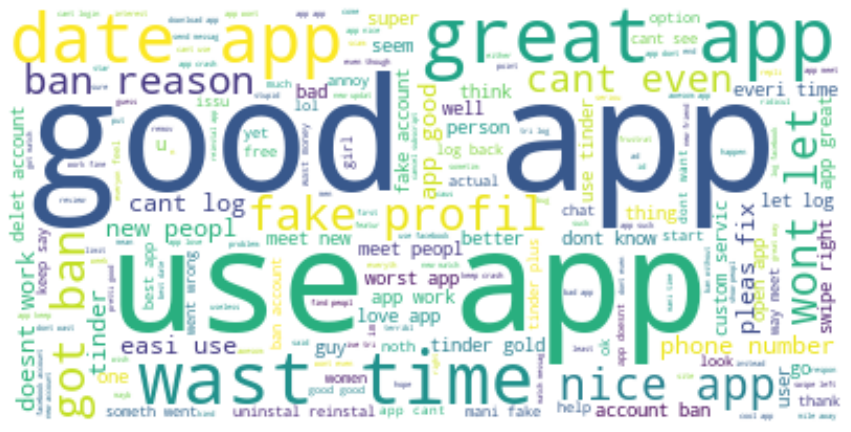

In [9]:
tind_text = " ".join(datatind.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(tind_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentimetal Scores

In [10]:
datatind["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in datatind["content"]]
datatind["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in datatind["content"]]
datatind["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in datatind["content"]]
datatind = datatind[["content", "Positive", "Negative", "Neutral"]]
datatind.head()

C:\Users\moade\AppData\Local\Temp/ipykernel_14872/73364057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatind["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in datatind["content"]]
C:\Users\moade\AppData\Local\Temp/ipykernel_14872/73364057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatind["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in datatind["content"]]
C:\Users\moade\AppData\Local\Temp/ipykernel_14872/73364057.py:3: SettingWithCopyWarning: 
A value is trying 

,content,Positive,Negative,Neutral
0,mi bloquearon sin ninguna razón cuando pregunt...,0.058,0.053,0.889
1,use get like day w new profil get one day som...,0.128,0.195,0.678
2,frustrat ive use app im even pay tinder gold s...,0.188,0.049,0.764
3,ban reason hack far know way get ban lift wors...,0.000,0.261,0.739
4,good,1.000,0.000,0.000


# Positive words type used in the app

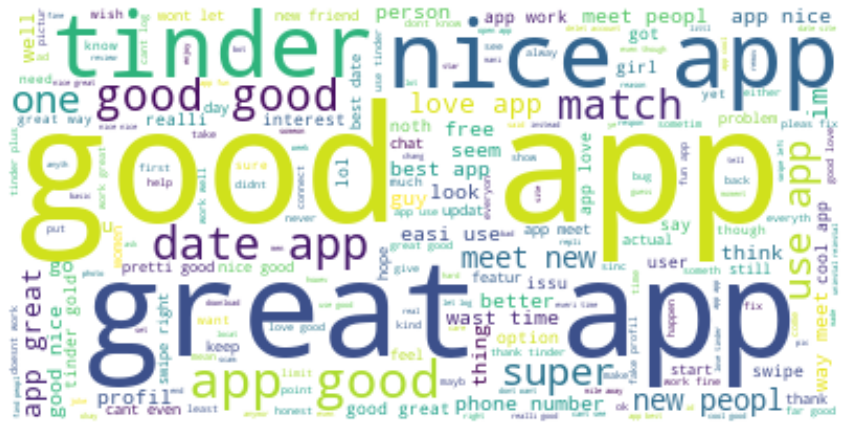

In [11]:
positive = ' '.join(
    list(datatind['content'][datatind['Positive'] > datatind["Negative"]])
)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Negative words type used in the app

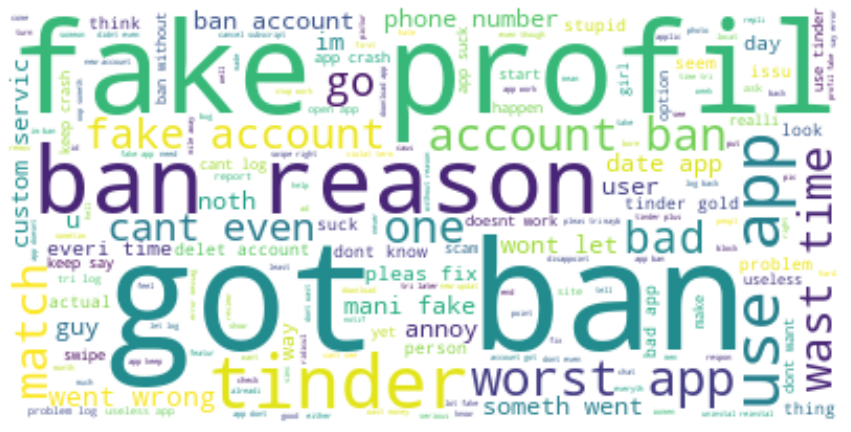

In [12]:
negative = ' '.join(
    list(datatind['content'][datatind['Negative'] > datatind["Positive"]])
)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Overall Sentimental Opinion

In [13]:
x = sum(datatind["Positive"])
y = sum(datatind["Negative"])
z = sum(datatind["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [14]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)


Positive:  167610.38400002735
Negative:  65785.18999999877
Neutral:  337406.38199995836


# As you can see, the positives outweigh the negatives, so we can say that most users are happy with Tinder.
